# Kernels and support vector machine regularization

## Introduction

### Kernels

A **similarity metric** is any computable function which can be used to measure how same or different two (or more) things we are comparing are to one another. Meaningful similarity metrics are highly domain specific, with various heuristics and approaches stretching across all the different fields of science available for measuring how much one thing relates to another thing. For example, natural language processing has metrics like [Levenshtein distance](https://en.wikipedia.org/wiki/Levenshtein_distance). If we are navigating around New York, [taxicab distance](https://en.wikipedia.org/wiki/Taxicab_geometry) would be meaningful. In machine learning applications more broadly, covariance and correlation are meaningful measurements. And so on.

A **kernel** is a specialized kind of similarity function. It takes two points as input, and returns their similarity as output, just as a similarity metric does. A mathematical result from linear algebra known as [Mercer's theorem](https://en.wikipedia.org/wiki/Mercer%27s_theorem) has the implication that a broad class of functions (e.g. similarity metrics) may be expressed in terms of a [dot product](https://en.wikipedia.org/wiki/Dot_product) in some (possibly very and even infinitely) high dimensional space. This means that calculations performed on points in high-dimensional spaces may be restated in terms of dot products.

Dot products are just multiplication, addition, and cosine operations, making them vastly more computationally tractable than performing those same high-dimensional calculations directly. Thus we may take input, transfer it to some extremely high dimensional space, run our machine learning algorithm in that space (by using the kernel function to measure distance, which is fast, instead of computing it directly, which is not), then transfer our results back down to the original input space (class predictions, separating hyperplanes, etcetera). This approach is known as the **kernel trick**.

For example: suppose we have features ${x_1, \ldots, x_{100}}$. We might run our machine learning algorithm in a space that is a kernel which helps us calculate $x_1^2$, $x_1^3, \ldots x_1^{100}, \ldots, x_{100}^2, \ldots, x_{100}^{100}$, and so on. That is an extremely high-dimension space, and calculating the Euclidean distance between two points in that space would be challenging (because $\sqrt{x_1^4+x_1^6+\ldots + x_{100}^{200}}$). A kernel that would handle that calculation would greatly increase the speed with which we could do this, and in turn, enable us to better "sniff out" separations between classes or relationships between features that exist all the way up to $\mathbb{P}^{100}$. Real kernels can include even more complex transforms.

### SVMs

I wrote a primer on support vector machines [here](https://www.kaggle.com/residentmario/primer-on-support-vector-machines) that is good background reading. Basically, support vector machines are a way of classifying points by building separating hyperplanes between them. Kernels and the kernel trick underpin how SVMs work because they allow the SVM to consider candidate separating hyperplanes in very high dimensions. Once you understand the basics of using the SVM algorithm, the choice of the kernel becomes the most important parameter you can tune.

In [1]:
from sklearn.svm import SVC
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

In [2]:
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

## Some kernels

Because kernels fundamentally modify how SVMs work, some example results from applying those kernels to a SVM on a toy dataset is a good way to gork the differences between different kernels. The plots in the next section do just that.  That being said, in higher-dimensional space these differences will tend to break down. Real-world data will tend to become more and more linearly separable as you add more features, (a function of the fact that there are $n!$ possible feature combinations), overfitting will also become a serious problem, and the configuration of the boundaries will become rather unpalatable.

### Linear kernel

Text(0.5, 1.0, 'SVC with linear kernel')

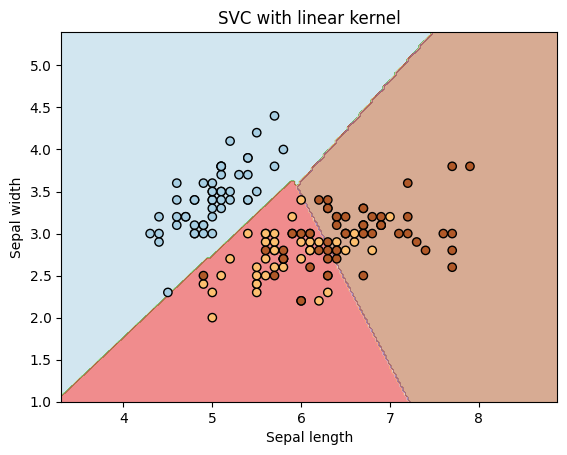

In [3]:
svc = SVC(kernel='linear').fit(X, y)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
plt.subplot(1, 1, 1)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.5)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, linewidth=1, edgecolor='black')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with linear kernel')

The feature space corresponding with a linear kernel is the original feature space. In other words a linear kernel is a direct translation of Euclidian distances, and there's no shadowy $n$-dimensional space involved at all. Linear kernel support vector machines have good performance only on very simple problems, like this toy Iris dataset. The more indecipherable the boundaries between class clusters become, the worse the performance of the algorithm. Overall, there's not much to say here, as this works exactly as you expect it to! (note: code from [analyticsvidhya](https://www.analyticsvidhya.com/blog/2017/09/understaing-support-vector-machine-example-code/)).

### Polynomial kernel

Text(0.5, 1.0, 'SVC with poly kernel')

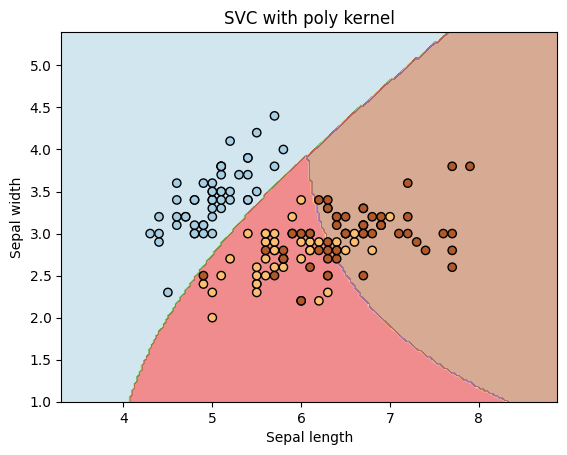

In [4]:
svc = SVC(kernel='poly', degree=3).fit(X, y)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
plt.subplot(1, 1, 1)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.5)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, linewidth=1, edgecolor='black')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with poly kernel')

The feature space corresponding with a poynomial kernel is the same as it is in polynomial regression. Each feature $x$ is copied over to $x^2$, $x^3$, and so on (up to `degree`, so only to 3 in this case), and then separating hyperplanes are drawn in that feature space. Drawing them in two dimensions, as here, demonstrates their polynomial nature. The `degree` paraemeter is unique to the polynomial kernel `SVC`.

Some notes. One is that in practice, the higher the `degree` the more overfitted the resulting space. Two is that the spaces generated by the separating hyperplane remain continuous and boundless. With more complex kernels this need not still be the case!

### RBF kernel

Text(0.5, 1.0, 'SVC with rbf kernel')

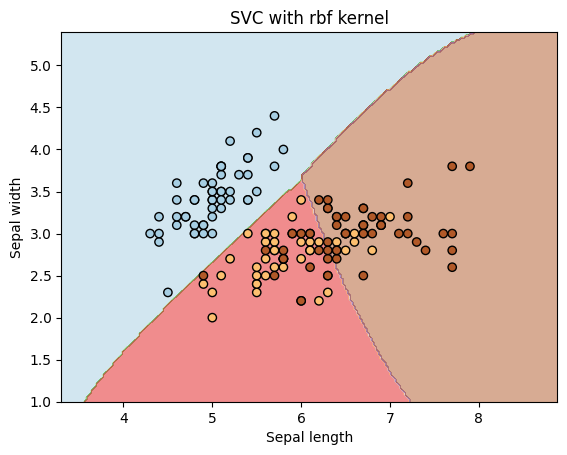

In [5]:
svc = SVC(kernel='rbf').fit(X, y)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
plt.subplot(1, 1, 1)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.5)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, linewidth=1, edgecolor='black')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with rbf kernel')

RBF is the most popular support vector machine kernel choice, and the default one used in `sklearn`. RBF is short for "radial basis function", a type of function that is used to approximate other functions in the literature. The math is complex, but basically it translates into the kernel that can create the most complex boundaries of the ones available to `sklearn`. RBFs are also behind kernel smoothing, and through that, [kernel density estimation](https://en.wikipedia.org/wiki/Kernel_density_estimation) (including KDE plots, which are popular in machine learning EDA).

Note that computing an RBF kernel is *very* expensive, and quickly becomes computationally intractable as the number of samples exceeds the low tens of thousands.

### Sigmoid

Text(0.5, 1.0, 'SVC with sigmoid kernel')

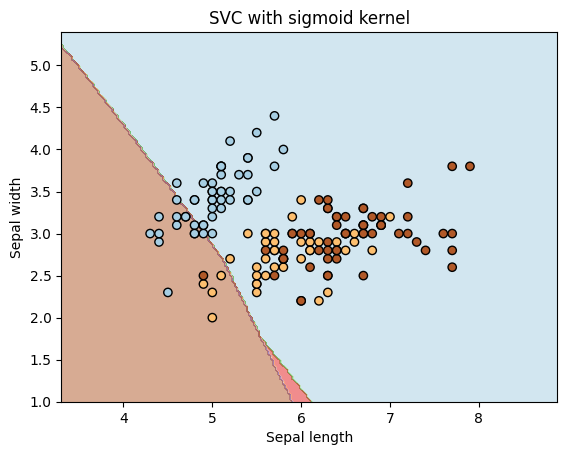

In [6]:
svc = SVC(kernel='sigmoid').fit(X, y)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
plt.subplot(1, 1, 1)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.5)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, linewidth=1, edgecolor='black')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with sigmoid kernel')

Sigmoid in general is a term for "curve-like". In the case of this parameter is probably referring to the [logistic function](https://en.wikipedia.org/wiki/Logistic_function), which plays a central role in logistic regression. Interestingly, this classifier actually collapses on the Iris dataset, but emperically it is known to have performance comparable to RBF for a variety of problems. A comparison laid out [in this Gist](https://gist.github.com/WittmannF/60680723ed8dd0cb993051a7448f7805) demonstrates what it looks like visually:

![](https://i.imgur.com/HKTLn35.png)

So basically expect the `sigmoid` SVC to attempt to capture the data classes using radial shapes.

## Regularization and kernel functions

Because they are transforming data into higher-dimensional spaces machine learning algorithms making use of the kernel trick have a tendancy to overfit. As always, regularization parameters are handy for controlling this. The `sklearn` SVM methods provide `C` and `gamma` functions for this purpose.

`gamma` ($\gamma$) is a multiplier that is applied as a regularization parameter within the kernel calculation. For example, the kernel for RBF is $K(u,v) = \exp{(-\gamma || u - v || ^ 2)}$. The larger the $\gamma$ value the more closely the SVM will fit the data. Since RBF is able to express arbitarily complex shapes (FYI) this leads to a perfectly fitted model a $\gamma \to \infty$. For other kernel functions this regularization parameter is applied at different parts of the calculation, resulting in different effects (but always with higher gamma meaning a closer fit, at risk of overfitting). In addition $\gamma$ will differ greatly by dataset and by level of normalization. There is no "right" gamma level; you will have to recalibrate it every time you approach a new problem. Reference [here](https://stats.stackexchange.com/questions/168014/where-can-i-read-about-gamma-coefficient-in-svm-in-scikit-learn).

The other regularization parameter is `C`. This is a fixed cost that is added on every time similarity is calculated&mdash;so essentially an [L1 norm](https://www.kaggle.com/residentmario/l1-norms-versus-l2-norms), in the underlying high-dimensional feature space. Higher levels of C "fuzz out" the optimality of the maximally separating hyperplanes generated by the SVM, resulting in more complex decision boundaries, and hence, a higher level of fit.

[This AnalyticsVidhya article shows the impact these two parameters have](https://www.analyticsvidhya.com/blog/2017/09/understaing-support-vector-machine-example-code/). Here are some panel comparisons generated there:

![](https://i.imgur.com/lURJeuA.png)

![](https://i.imgur.com/lWGdDPS.png)

You can also try forking this notebook and playing with them yourself:

Text(0.5, 1.0, 'SVC with linear kernel')

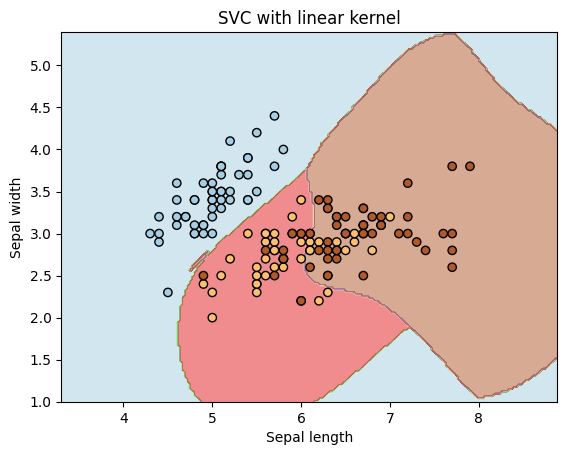

In [7]:
svc = SVC(kernel='rbf', gamma=1, C=100).fit(X, y)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
plt.subplot(1, 1, 1)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.5)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, linewidth=1, edgecolor='black')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with linear kernel')

These regularization parameters are exposed via the support vector machine class, but there's nothing about them that is intrinsic to SVMs. Any machine learning algorithm that uses kernels can, in theory, feature them.